# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [296]:
df = pd.read_csv("../data/MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [300]:
# Agrupando a partir da coluna Categoria e realizando o calculo da média;
med_df = df.groupby("Categoria")["Preco_Normal"].mean().reset_index()

# Renomeando a coluna "Media";
med_df.rename(columns={"Preco_Normal":"Media"}, inplace=True)


In [332]:
# Agrupando a partir da coluna Categoria e realizando o calculo da mediana;
med_df_ = df.groupby("Categoria")["Preco_Normal"].median().reset_index()

# Agrupando os dataframes;
med_df["Mediana"] = med_df_["Preco_Normal"]

# Dataframe agrupado e formatado;
med_df.sort_values("Mediana", ascending=False)

print("Valores de Média e Mediana:")
med_df

Valores de Média e Mediana:


,Categoria,Media,Mediana
0,belleza-y-cuidado-personal,1783.556485,1569.0
1,comidas-preparadas,3095.043478,3290.0
2,congelados,2108.042553,1519.0
3,frutas,1724.473684,1195.0
4,instantaneos-y-sopas,765.491228,439.0
5,lacteos,2385.219239,989.0
6,verduras,1343.296875,1180.0


In [340]:
# Calculando o valor da diferença entre a média e a mediana;

dif_med = med_df.groupby("Categoria").apply(
    lambda group: abs(group["Media"] - group["Mediana"])).reset_index(name="Diferenca")

print("Gap entre Média e Mediana:")
dif_med.sort_values("Diferenca", ascending=False)


Gap entre Média e Mediana:


,Categoria,level_1,Diferenca
5,lacteos,5,1396.219239
2,congelados,2,589.042553
3,frutas,3,529.473684
4,instantaneos-y-sopas,4,326.491228
0,belleza-y-cuidado-personal,0,214.556485
1,comidas-preparadas,1,194.956522
6,verduras,6,163.296875


"Media" e "Mediana"

# 1.1 Verificando a quantidade de valores únicos

In [308]:
# Verificando a quantidade de valores unicos no campo Preco_Normal;
unicos = df.groupby("Categoria")["Preco_Normal"].nunique()
unicos

Categoria
belleza-y-cuidado-personal     85
comidas-preparadas             20
congelados                     94
frutas                         16
instantaneos-y-sopas           20
lacteos                       175
verduras                       42
Name: Preco_Normal, dtype: int64

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [311]:
#Seu código aqui
std_df = df.groupby("Categoria")["Preco_Normal"].std().reset_index()
std_df.sort_values("Preco_Normal", ascending=False)

,Categoria,Preco_Normal
5,lacteos,3925.816164
0,belleza-y-cuidado-personal,2210.041719
2,congelados,2111.539896
1,comidas-preparadas,2019.911428
3,frutas,1639.151114
4,instantaneos-y-sopas,1170.232869
6,verduras,1012.699625


Observando os dados de desvio padrão e média/mediana, podemos notar que quanto maior a diferença entre a média e mediana, maior tende a ser o desvio padrão, porém, além disso, podemos notar que quanto maior o número de valores únicos, também tende a ser maior o desvio padrão, e isso pode explicar a diferença entre a ordem das observações entre as diferenças dos valores da média e mediana, e as observações que eram esperadas nos valores de desvio padrão.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

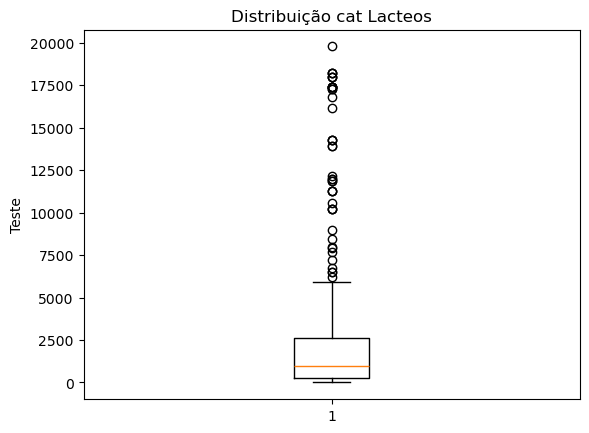

In [316]:
#Seu código aqui
df_lacteos = df.loc[df["Categoria"]=="lacteos"]
dados = df_lacteos["Preco_Normal"]
plt.boxplot(dados)
plt.title("Distribuição cat Lacteos")
plt.ylabel("Teste")
plt.show()

Observando o gráfico boxplot, fica claro que não estamos lidando com um campo de distribuição normal, pois o nosso valor médio está totalmente deslocado da posição central dos nossos dados, e isso certamente se deve a grande quantidade de valores outliers presentes na categoria.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

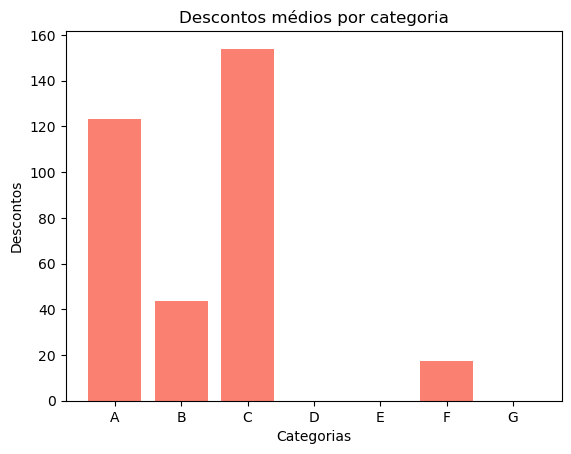

In [320]:
# Calculando a média por categoria;
med_desc = df.groupby("Categoria")["Desconto"].mean().reset_index()

# Renomeando as categorias;
n_names = {"belleza-y-cuidado-personal":"A", "comidas-preparadas":"B", "congelados":"C", "frutas":"D", "instantaneos-y-sopas":"E", "lacteos":"F", "verduras":"G"}
med_desc["Categoria"] = med_desc["Categoria"].replace(n_names)
'''
        DICIONÁRIO:
belleza-y-cuidado-personal":"A"
"comidas-preparadas":"B"
"congelados":"C"
"frutas":"D"
"instantaneos-y-sopas":"E"
"lacteos":"F"
"verduras":"G"
'''

# Plotando o gráfico;
plt.bar(med_desc["Categoria"], med_desc["Desconto"], color="salmon")
plt.title("Descontos médios por categoria")
plt.xlabel("Categorias")
plt.ylabel("Descontos")
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

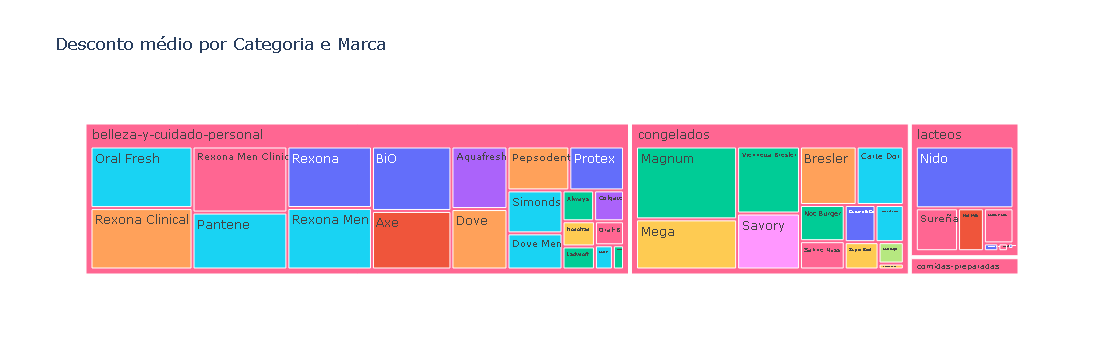

In [328]:
# Agrupando os dados a partir do campo categoria e marca, e calculando o valor médio do campo desconto;
desc_med_cat_marc = df.groupby(["Categoria", "Marca"])["Desconto"].mean().reset_index()

# Configurando o grafico;
fig = px.treemap(desc_med_cat_marc,
                path=["Categoria", "Marca"],
                values="Desconto",
                title="Desconto médio por Categoria e Marca",
                color="Marca")

# Plotando o gráfico;
fig.show()